In [222]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [95]:
cun_type = pd.read_csv('./관광소비_유형.csv', encoding='cp949')

In [96]:
df = pd.DataFrame(cun_type)

In [97]:
df.columns = ['대분류', '중분류', '소비액(천원)']

In [98]:
df.head()

,대분류,중분류,소비액(천원)
0,쇼핑업,관광기념품,"658,439"
1,쇼핑업,레저용품쇼핑,"17,557,618"
2,쇼핑업,대형쇼핑몰,"40,675,488"
3,숙박업,호텔,"1,920,292"
4,숙박업,콘도,"3,785,115"


In [99]:
df = df.drop(['중분류'],  axis=1)

In [88]:
df

,대분류,소비액(천원)
0,쇼핑업,"658,439"
1,쇼핑업,"17,557,618"
2,쇼핑업,"40,675,488"
3,숙박업,"1,920,292"
4,숙박업,"3,785,115"
5,숙박업,"403,996"
6,숙박업,"19,860,605"
7,식음료업,"209,613,066"
8,여가서비스업,"1,093,700"
9,여가서비스업,"7,953,039"


In [100]:
df.dtypes

대분류        object
소비액(천원)    object
dtype: object

In [109]:
df.astype({'소비액(천원)':'str'}).dtypes

대분류        object
소비액(천원)    object
dtype: object

In [115]:
df['소비액(천원)'].str[0:]

0         658,439 
1      17,557,618 
2      40,675,488 
3       1,920,292 
4       3,785,115 
5         403,996 
6      19,860,605 
7     209,613,066 
8       1,093,700 
9       7,953,039 
10        615,241 
11      2,334,002 
12          6,887 
13         90,519 
14              0 
15         43,917 
Name: 소비액(천원), dtype: object

In [119]:
df['소비액(천원)'].replace()?

SyntaxError: invalid syntax (Temp/ipykernel_20220/3942372503.py, line 1)

In [ ]:
df['소비액(천원)'].replace

In [123]:
df['소비액(천원)'] = df['소비액(천원)'].str.replace(',', '')

In [124]:
df

,대분류,소비액(천원)
0,쇼핑업,658439
1,쇼핑업,17557618
2,쇼핑업,40675488
3,숙박업,1920292
4,숙박업,3785115
5,숙박업,403996
6,숙박업,19860605
7,식음료업,209613066
8,여가서비스업,1093700
9,여가서비스업,7953039


In [131]:
df['소비액(천원)'] = df['소비액(천원)'].astype('int')

In [132]:
df

,대분류,소비액(천원)
0,쇼핑업,658439
1,쇼핑업,17557618
2,쇼핑업,40675488
3,숙박업,1920292
4,숙박업,3785115
5,숙박업,403996
6,숙박업,19860605
7,식음료업,209613066
8,여가서비스업,1093700
9,여가서비스업,7953039


In [133]:
group = df.groupby('대분류') #먼저 groupby로 쓸 컬럼의 기준을 세워준다.
group.size()

대분류
쇼핑업       3
숙박업       4
식음료업      1
여가서비스업    4
여행업       1
운송업       3
dtype: int64

In [134]:
cleaned_df = group.sum()

In [135]:
cleaned_df

,소비액(천원)
대분류,
쇼핑업,58891545
숙박업,25970008
식음료업,209613066
여가서비스업,11995982
여행업,6887
운송업,134436


In [152]:
cleaned_df.sum()

소비액(천원)                          306611924
rate       소비액(천원)    100.0
dtype: float64
dtype: object

In [154]:
#cleaned_df['rate'] = 
합계= []  
for a in cleaned_df['소비액(천원)'] :
    rate = a / 306611924 * 100
    합계.append(rate)
print(합계)

[19.20719332494062, 8.469992836938722, 68.36429035943168, 3.912431663942724, 0.002246161828983533, 0.0438456529172688]


In [155]:
cleaned_df['rate'] = 합계

In [200]:
cleaned_df

,소비액(천원),rate
대분류,,
쇼핑업,58891545,19.207193
숙박업,25970008,8.469993
식음료업,209613066,68.364290
여가서비스업,11995982,3.912432
여행업,6887,0.002246
운송업,134436,0.043846


In [170]:
cleaned_df.iloc[0]

소비액(천원)    5.889154e+07
rate       1.920719e+01
Name: 쇼핑업, dtype: float64

In [201]:
cleaned_df = cleaned_df.reset_index()

In [196]:
합계 = {'대분류':'합계', '소비액(천원)':소비액합계, 'rate':비율합계}

In [207]:
cleaned_df = cleaned_df.append(합계, ignore_index=True)

KeyError: "['합계'] not found in axis"

In [208]:
cleaned_df

,대분류,소비액(천원),rate
0,쇼핑업,58891545,19.207193
1,숙박업,25970008,8.469993
2,식음료업,209613066,68.364290
3,여가서비스업,11995982,3.912432
4,여행업,6887,0.002246
5,운송업,134436,0.043846
6,합계,306611924,100.000000
7,합계,306611924,100.000000
8,합계,306611924,100.000000
9,합계,306611924,100.000000


In [219]:
cleaned_df = cleaned_df.drop([7, 8, 9, 10], axis=0)

In [220]:
cleaned_df

,대분류,소비액(천원),rate
0,쇼핑업,58891545,19.207193
1,숙박업,25970008,8.469993
2,식음료업,209613066,68.364290
3,여가서비스업,11995982,3.912432
4,여행업,6887,0.002246
5,운송업,134436,0.043846
6,합계,306611924,100.000000


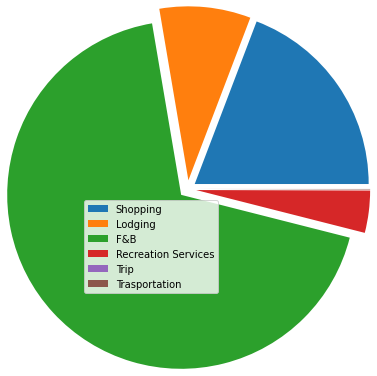

In [255]:
data = cleaned_df['rate'][:6]
labels = ['Shopping', 'Lodging', 'F&B', 'Recreation Services', 'Trip', 'Trasportation']
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(data, radius=2, explode=explode)
plt.legend(labels, loc='lower left')

In [256]:
plt.savefig('piechart.png')

<Figure size 432x288 with 0 Axes>

plt.pie?

plt.legend?